# Mars Weather 
### Deliverable 2: Scrape and Analyze Mars Weather Data

In [68]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.


In [70]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

In [71]:
# Create a Beautiful Soup Object
html = browser.html
soup_weather = bs(html, "html.parser")

In [72]:
# Extract all rows of data
table = soup_weather.find('table', class_='table table-striped')
rows = soup_weather.find_all('tr', class_ = 'data-row')

print(len(rows))


1867


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. For refrence, they are listed below: 

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [73]:
# Create an empty list
mars_weather = []

# Loop through the scraped data to create a list of rows
for row in rows:
    columns = row.find_all('td')
    data = {
        'id': columns[0].text,
        'terrestrial_date': columns[1].text,
        'sol': columns[2].text,
        'ls': columns[3].text,
        'month': columns[4].text,
        'min_temp': columns[5].text,
        'pressure': columns[6].text
    }

    mars_weather.append(data)

In [74]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_weather)

In [75]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.


In [76]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [77]:
# Change data types for data analysis
df = df.astype({"id": int, 
               "sol": int, 
               "ls": float, 
               "month": int, 
               "min_temp": float, 
               "pressure": float})

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze the dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days’ worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth when Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [78]:
# 1. How many months are there on Mars?
months_mars = df['month'].nunique()
print(f"There are {months_mars} months on Mars.")


There are 12 months on Mars.


In [79]:
# 2. How many sols (Martian days) worth of data are there?
sols_mars = df['sol'].nunique()
print(f"There are {sols_mars} sols worth of data.")

There are 1867 sols worth of data.


In [80]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df.groupby('month').agg({'min_temp': 'mean'}) 
avg_min_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


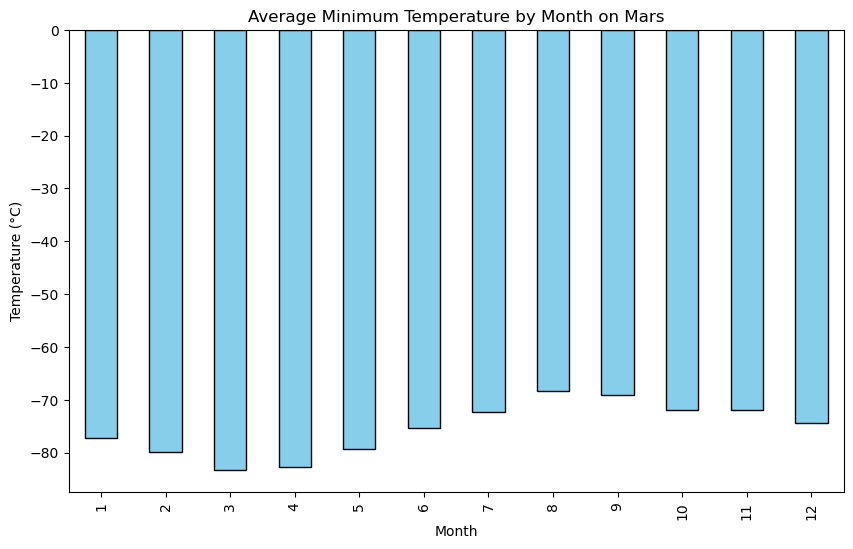

In [88]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10,6), legend=False)
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

In [84]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_sorted = avg_min_temp.sort_values(by='min_temp')
avg_min_temp_sorted

,min_temp
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


In [85]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby('month').agg({'pressure': 'mean'})   
avg_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


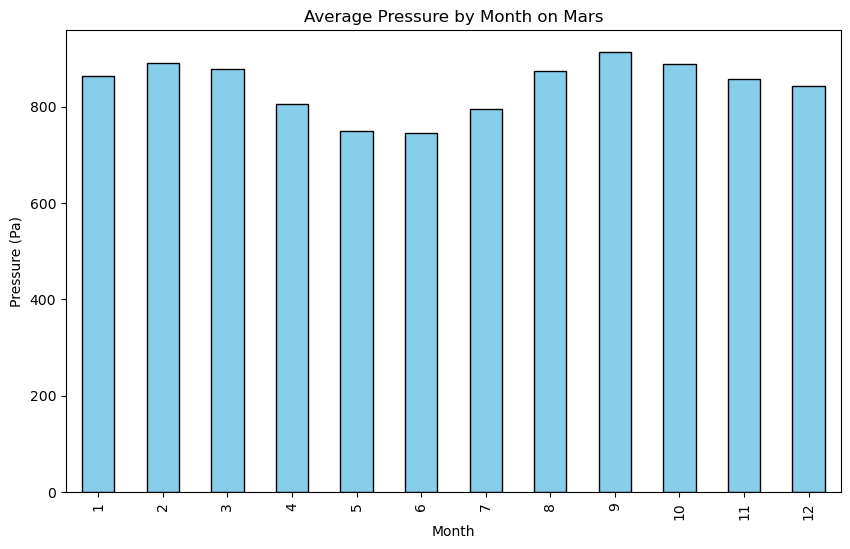

In [87]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10,6), legend=False)
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Pressure (Pa)')
plt.show()

In [89]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_sorted = avg_pressure.sort_values(by='pressure')
avg_pressure_sorted

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


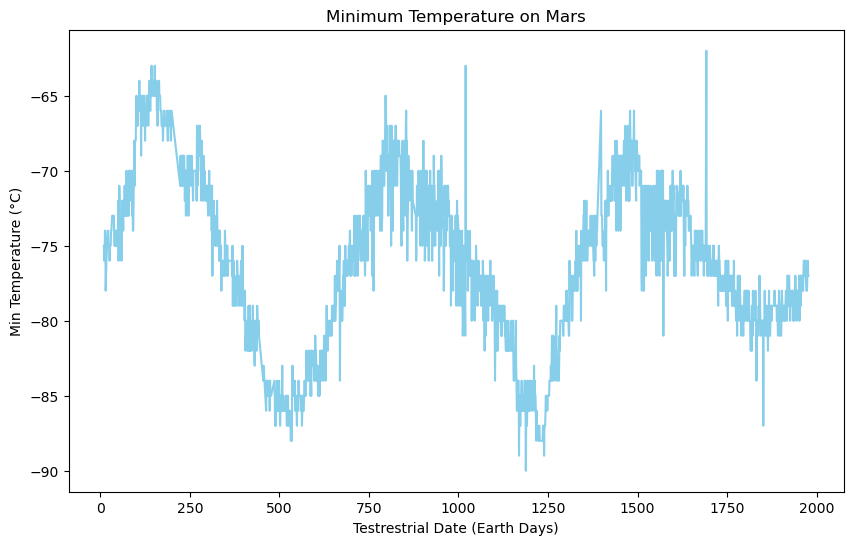

There are 1867 terrestrial days in a Martian year.


In [ ]:
# 5. How many terrestrial (Earth) days are there in a Martian year? 
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
df.plot(x='sol', y='min_temp', color='skyblue', kind='line', figsize=(10,6), legend=False)
plt.title('Minimum Temperature on Mars')
plt.xlabel('Testrestrial Date (Earth Days)')
plt.ylabel('Min Temperature (°C)')
plt.show()


#### Minimum Temperature

Based on the data in the previous graph of temperature analysis, it was found that the coldest month on Mars is Month 6 at a temperature of -83.3 °C. The hottest month is Month 8, with a temperature of -68.9 °C.

#### Atmospheric Pressure

Based on the data given, the lowest pressure month is Month 6 at 745.05, and the highest pressure month is Month 9 at 913.30.

#### Year Length

Based on the data, we can use the graph above to estimate the number of terrestrial days by observing the peak-to-peak and trough-to-trough. This can help understand in correlation to the number of Earth days since the number of cycles are related to the number of sols in a Martian year, representing the time it takes for Mars to complete one full orbit around the sun. The distance between the peaks and troughs is approximately 670 sols. This was found by calculating the peak-to-peak: 
* 800 - 150 = 650 
* 1500 - 800 = 700 

And calculating the trough-to-trough: 
* 1200 - 525 = 675

The average of all of these values is roughly around 675 days (Source: [NASA](https://science.nasa.gov/mars/facts/)). This number is very close to the actual number of earth days (687). Therefore, there are approximately 670 sols in a Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [96]:
# Write the data to a CSV
df.to_csv('mars_weather.csv', index=False)

In [97]:
browser.quit()